# Set up environment

In [1]:
# Numpy
import numpy as np
import numpy.random as rand

# Sklearn and interpolation
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
import umap

# Plotting
import matplotlib.pyplot as plt

# Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Import the path of function
import sys
import importlib
sys.path.append('/local_data/notebooks/clintko/GitRepo/Proj_SingleCell/Test Func')

# Import tool of flow to image
import Tool_flow2img
importlib.reload(Tool_flow2img)
from Tool_flow2img import *

# Read in the dataset

In [3]:
# input the value
tmp_dir = "/data/deep-learning-group/test_data/flow_EQAPOL/"
fname_Costim = "data_Costim.np"
fname_CMV    = "data_CMV.np"
fname_SEB    = "data_SEB.np"

# open and write the file
print("read Costim")
file_object = open(tmp_dir + fname_Costim, 'rb')
data_Costim = np.load(file_object)
file_object.close()

print("read CMV")
file_object = open(tmp_dir + fname_CMV, 'rb')
data_CMV = np.load(file_object)
file_object.close()

print("read SEB")
file_object = open(tmp_dir + fname_SEB, 'rb')
data_SEB = np.load(file_object)
file_object.close()

print("read markers")
file_object = open(tmp_dir + "markers.np", 'rb')
markers = np.load(file_object)
markers_dict = {items[1]: idx for idx, items in enumerate(markers)}
file_object.close()

print("The data are input.")

read Costim
read CMV
read SEB
read markers
The data are input.


In [4]:
#data_samples      = np.array(list(data_Costim) + list(data_CMV) + list(data_SEB))
#label_groups = np.array(            \
#    [0] * len(list(data_Costim)) +  \
#    [1] * len(list(data_CMV)) +     \
#    [2] * len(list(data_SEB)))
#data_Costim[0].shape

# Preprocess

get the samples from three groups

In [8]:
data_samples = np.array(
    list(data_Costim)[0:2] + 
    list(data_CMV)[0:2] + 
    list(data_SEB)[0:2])

data_labels = [0, 0, 1, 1, 2, 2]

print("===== Raw Shape ======")
print(data_samples.shape)
print(data_samples[0].shape) # Costim
print(data_samples[1].shape) # Costim
print(data_samples[2].shape) # CMV
print(data_samples[3].shape) # CMV
print(data_samples[4].shape) # SEB
print(data_samples[5].shape) # SEB

===== Raw Shape ======
(6,)
(455472, 14)
(607410, 14)
(411894, 14)
(515178, 14)
(422658, 14)
(519426, 14)


standardize all the samples based on the first sample

In [9]:
data_samples_std = data_standardization(data_samples, verbose=True)

Data Standardization...
...Finish


randomly subset data points in each sample

In [12]:
print("===== 10,000 cells ======")
data_labels_sub, data_samples_sub = data_subsetting(
    data_samples_std, 
    data_labels, 
    k = 10000, 
    num_subsets = 2, 
    rand_seed   = 0,
    verbose = True)

print("===== Shape After subsetting ======")
print(data_samples_sub.shape)
print(data_samples_sub[0].shape) # Costim
print(data_samples_sub[1].shape) # Costim
print(data_samples_sub[2].shape) # Costim
print(data_samples_sub[3].shape) # Costim
print(data_samples_sub[4].shape) # CMV
print(data_samples_sub[5].shape) # CMV
print(data_samples_sub[6].shape) # CMV
print(data_samples_sub[7].shape) # CMV
print(data_samples_sub[8].shape) # SEB
print(data_samples_sub[9].shape) # SEB
print(data_samples_sub[10].shape) # SEB
print(data_samples_sub[11].shape) # SEB

===== 10,000 cells ======
Data Subsetting...
...Finish
===== Shape After subsetting ======
(12, 10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)


Generate UMAP  
Note: for 10000 events / cells, it took about 20~30 sec to generate one UMAP plot

In [13]:
print("===== Dim Reduct ======\n")
data_umap = create_umap(data_samples_sub, verbose = True)

print("===== UMAP Shape ======")
print(data_umap.shape)
print(data_umap[0].shape) # Costim
print(data_umap[1].shape) # Costim
print(data_umap[2].shape) # Costim
print(data_umap[3].shape) # Costim
print(data_umap[4].shape) # CMV
print(data_umap[5].shape) # CMV
print(data_umap[6].shape) # CMV
print(data_umap[7].shape) # CMV
print(data_umap[8].shape) # SEB
print(data_umap[9].shape) # SEB
print(data_umap[10].shape) # SEB
print(data_umap[11].shape) # SEB

===== Dim Reduct ======

Create UMAP plots...
	Prepare UMAP plot of the 0 sample
	Prepare UMAP plot of the 1 sample
	Prepare UMAP plot of the 2 sample
	Prepare UMAP plot of the 3 sample
	Prepare UMAP plot of the 4 sample
	Prepare UMAP plot of the 5 sample
	Prepare UMAP plot of the 6 sample
	Prepare UMAP plot of the 7 sample
	Prepare UMAP plot of the 8 sample
	Prepare UMAP plot of the 9 sample
	Prepare UMAP plot of the 10 sample
	Prepare UMAP plot of the 11 sample
...Finish
===== UMAP Shape ======
(12, 10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)


It took 30~35 sec to run UMAP on 30,000 events and 2.5 min to run UMAP on 120,000

In [39]:
print("===== Dim Reduct ======\n")
data_umap_pool = create_umap_pool(data_samples_sub, verbose = True)
data_umap_pool = data_umap_pool.reshape([12, -1, 2])

print("===== UMAP Shape ======")
print(data_umap_pool.shape)

===== Dim Reduct ======

Create UMAP plots...
...Finish
===== UMAP Shape ======
(12, 10000, 2)


plot the results

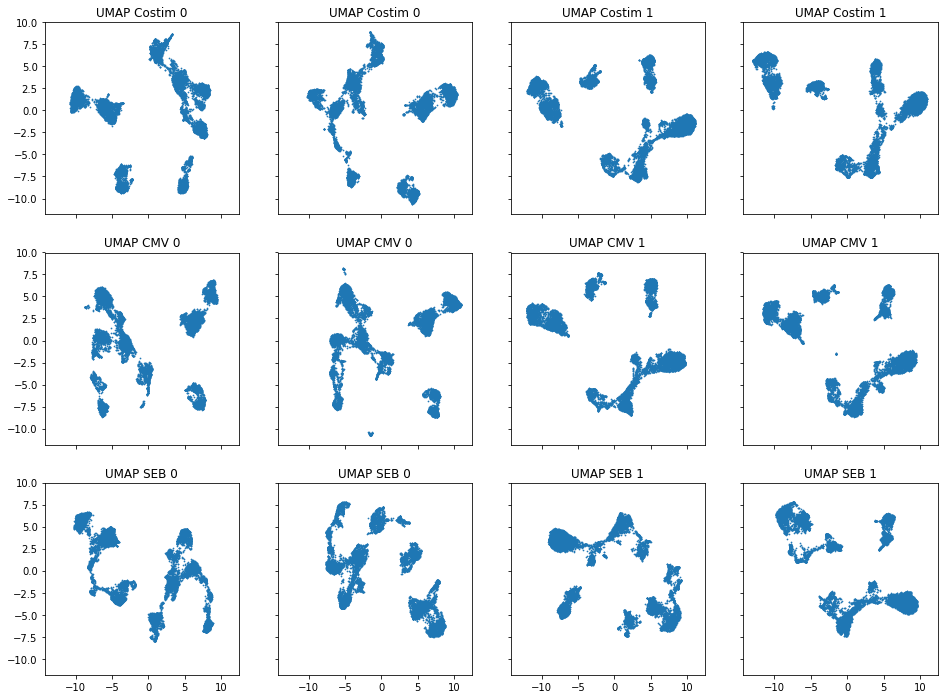

In [43]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap[idx][:, 0], 
            data_umap[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

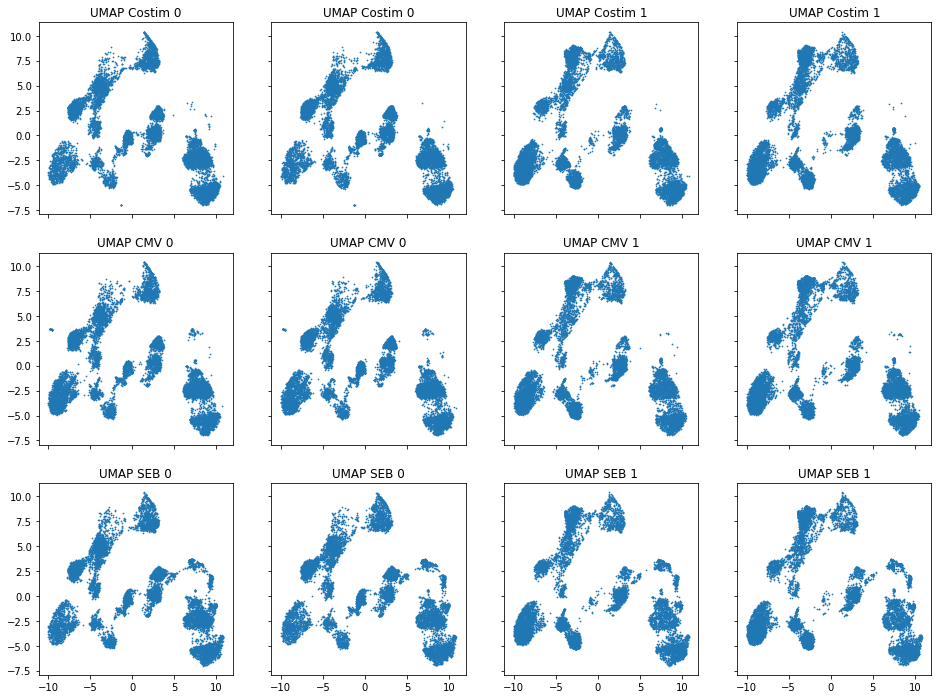

In [42]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap_pool[idx][:, 0], 
            data_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

# Train on the first sample to approximate others

In [55]:
# get the first sample
X      = data_samples_sub[0]
y_umap = data_umap[0]

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_umap, train_size = 0.9)

/local_data/env-py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
model = Sequential()
model.add(Dense(128, input_shape=(14,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [57]:
history = model.fit(
    X_train, y_train, 
    epochs = 100, 
    batch_size = 1000, 
    verbose = 0,                
    validation_data=(X_test, y_test))

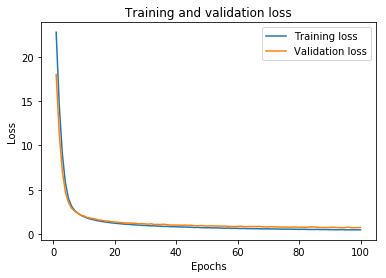

In [58]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

compare train and test

In [59]:
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

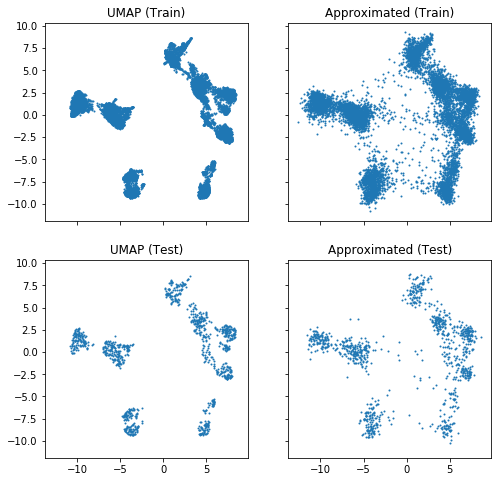

In [60]:
fig, axes = plt.subplots(figsize=(8, 8), nrows = 2, ncols = 2, sharex = True, sharey = True)
axes[0, 0].scatter(y_train[:, 0], y_train[:, 1], s = 1)
axes[0, 0].set_title('UMAP (Train)')

axes[0, 1].scatter(yhat_train[:, 0], yhat_train[:, 1], s = 1)
axes[0, 1].set_title('Approximated (Train)')

axes[1, 0].scatter(y_test[:, 0], y_test[:, 1], s = 1)
axes[1, 0].set_title('UMAP (Test)')

axes[1, 1].scatter(yhat_test[:, 0], yhat_test[:, 1], s = 1)
axes[1, 1].set_title('Approximated (Test)')

plt.show()

train on other samples

In [61]:
y = list()
for idx in range(len(data_samples_sub)):
    y.append(model.predict(data_samples_sub[idx]))
    
y = np.array(y)
print(y.shape)

(12, 10000, 2)


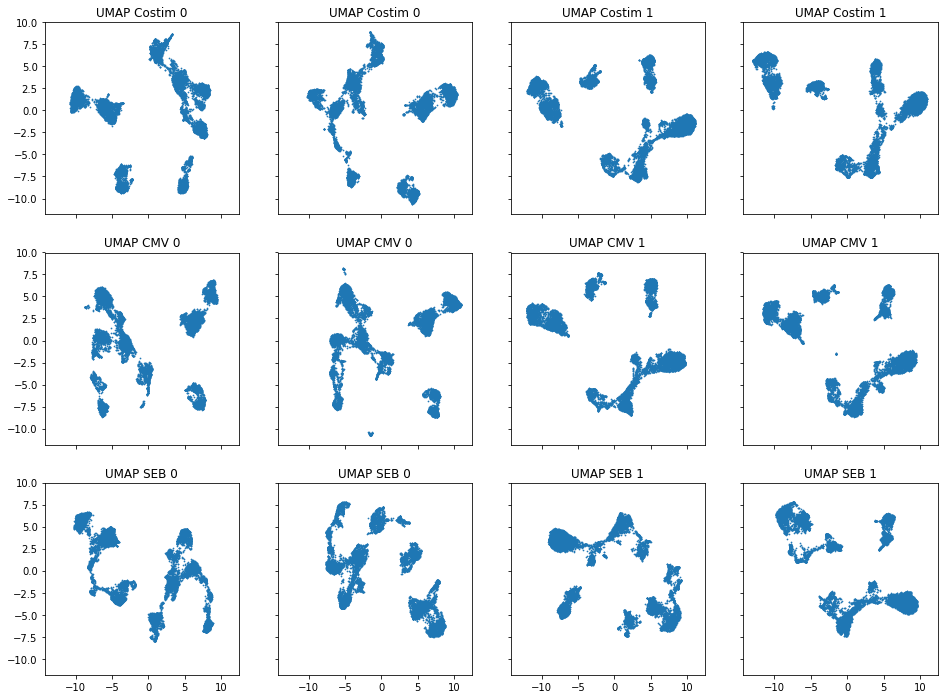

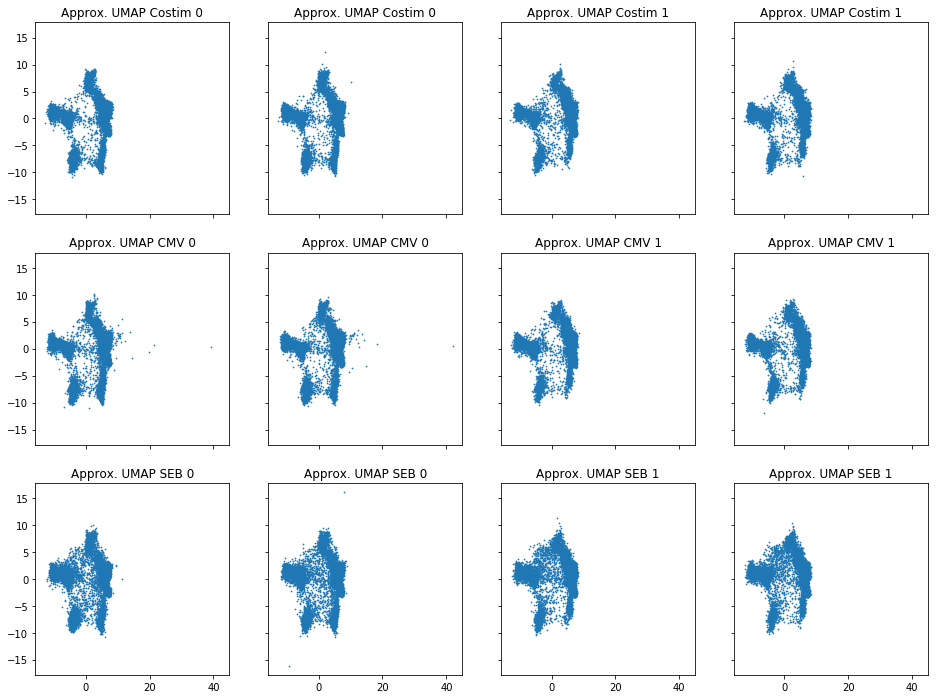

In [63]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap[idx][:, 0], 
            data_umap[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()
#####################################################################
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "Approx. UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

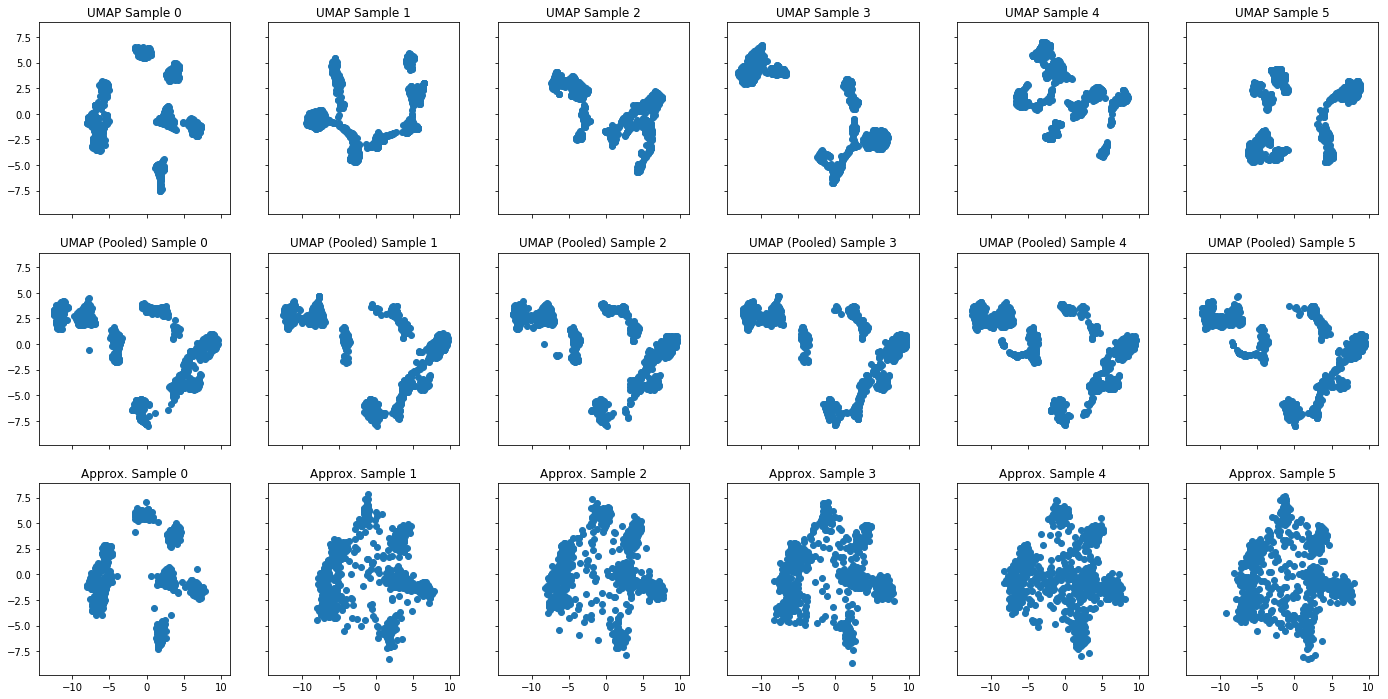

In [181]:
fig, axes = plt.subplots(figsize=(24, 12), nrows = 3, ncols = 6, sharex = True, sharey = True)
for idx in range(6):    
    axes[0, idx].scatter(data_umap[idx][:, 0], data_umap[idx][:, 1])
    axes[0, idx].set_title('UMAP Sample ' + str(idx))

for idx in range(6):    
    axes[1, idx].scatter(data_umap_pool[idx][:, 0], data_umap_pool[idx][:, 1])
    axes[1, idx].set_title('UMAP (Pooled) Sample ' + str(idx))    
    
for idx in range(6):    
    axes[2, idx].scatter(y[idx][:, 0], y[idx][:, 1])
    axes[2, idx].set_title('Approx. Sample ' + str(idx))


plt.show()

# Train on the first sample to approximate others (Pooled UMAP)

In [190]:
# get the first sample
X      = data_samples_E3[0]
y_umap = data_umap_pool[0]

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_umap, train_size = 0.9)

/local_data/env-py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [281]:
model = Sequential()
model.add(Dense(100000, input_shape=(14,), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [282]:
history = model.fit(
    X_train, y_train, 
    epochs = 200, 
    batch_size = 100, 
    verbose = 0,                
    validation_data=(X_test, y_test))

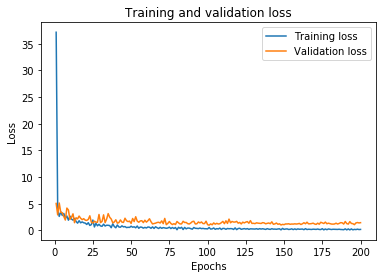

In [283]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [284]:
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

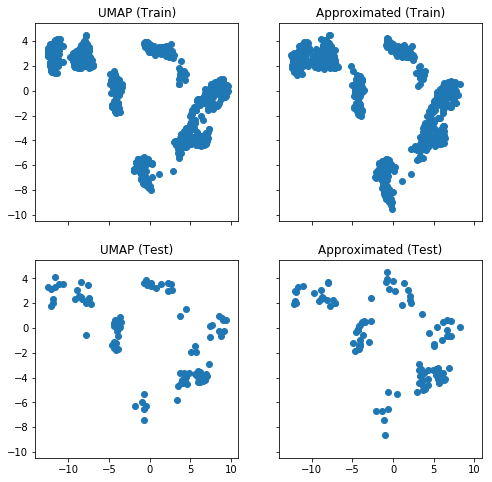

In [285]:
fig, axes = plt.subplots(figsize=(8, 8), nrows = 2, ncols = 2, sharex = True, sharey = True)
axes[0, 0].scatter(y_train[:, 0], y_train[:, 1])
axes[0, 0].set_title('UMAP (Train)')

axes[0, 1].scatter(yhat_train[:, 0], yhat_train[:, 1])
axes[0, 1].set_title('Approximated (Train)')

axes[1, 0].scatter(y_test[:, 0], y_test[:, 1])
axes[1, 0].set_title('UMAP (Test)')

axes[1, 1].scatter(yhat_test[:, 0], yhat_test[:, 1])
axes[1, 1].set_title('Approximated (Test)')

plt.show()

In [286]:
y = list()
for idx in range(len(data_samples_E3)):
    y.append(model.predict(data_samples_E3[idx]))
    
y = np.array(y)
print(y.shape)

(6, 1000, 2)


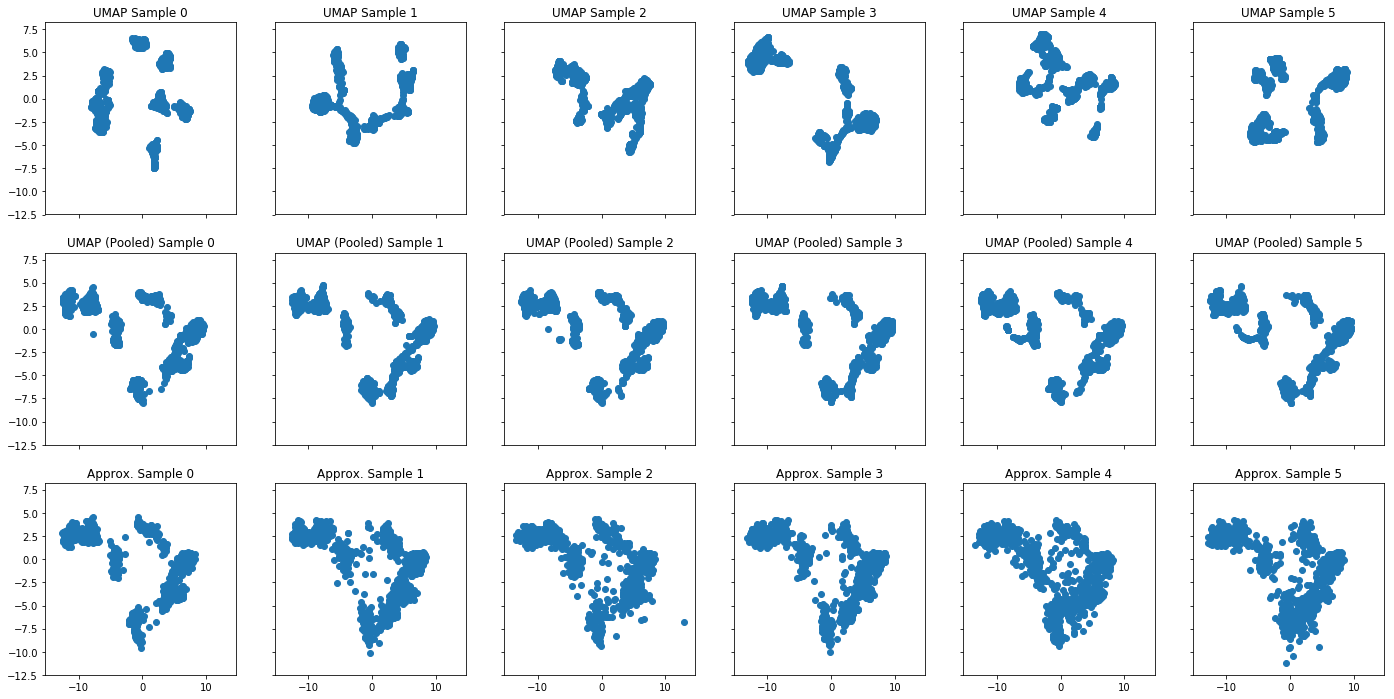

In [287]:
fig, axes = plt.subplots(figsize=(24, 12), nrows = 3, ncols = 6, sharex = True, sharey = True)
for idx in range(6):    
    axes[0, idx].scatter(data_umap[idx][:, 0], data_umap[idx][:, 1])
    axes[0, idx].set_title('UMAP Sample ' + str(idx))

for idx in range(6):    
    axes[1, idx].scatter(data_umap_pool[idx][:, 0], data_umap_pool[idx][:, 1])
    axes[1, idx].set_title('UMAP (Pooled) Sample ' + str(idx))    
    
for idx in range(6):    
    axes[2, idx].scatter(y[idx][:, 0], y[idx][:, 1])
    axes[2, idx].set_title('Approx. Sample ' + str(idx))


plt.show()

# Train on the three samples (one for each group) to approximate others (Pooled UMAP)

In [87]:
# get the first sample
X      = np.vstack(data_samples_sub[[0, 4, 8]])
y_umap = np.vstack(data_umap_pool[[0, 4, 8]])

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_umap, train_size = 0.9, random_state = 0)

/local_data/env-py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [88]:
X_train.shape

(27000, 14)

In [89]:
model = Sequential()
model.add(Dense(128, input_shape=(14,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [90]:
history = model.fit(
    X_train, y_train, 
    epochs = 1000, 
    batch_size = 3000, 
    verbose = 0,                
    validation_data=(X_test, y_test))

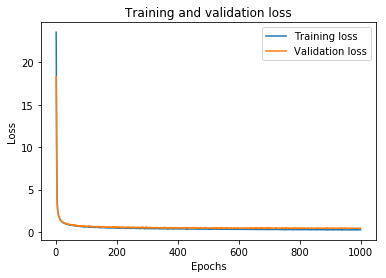

In [91]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [94]:
y = list()
for idx in range(len(data_samples_sub)):
    y.append(model.predict(data_samples_sub[idx]))
    
y = np.array(y)
print(y.shape)

(12, 10000, 2)


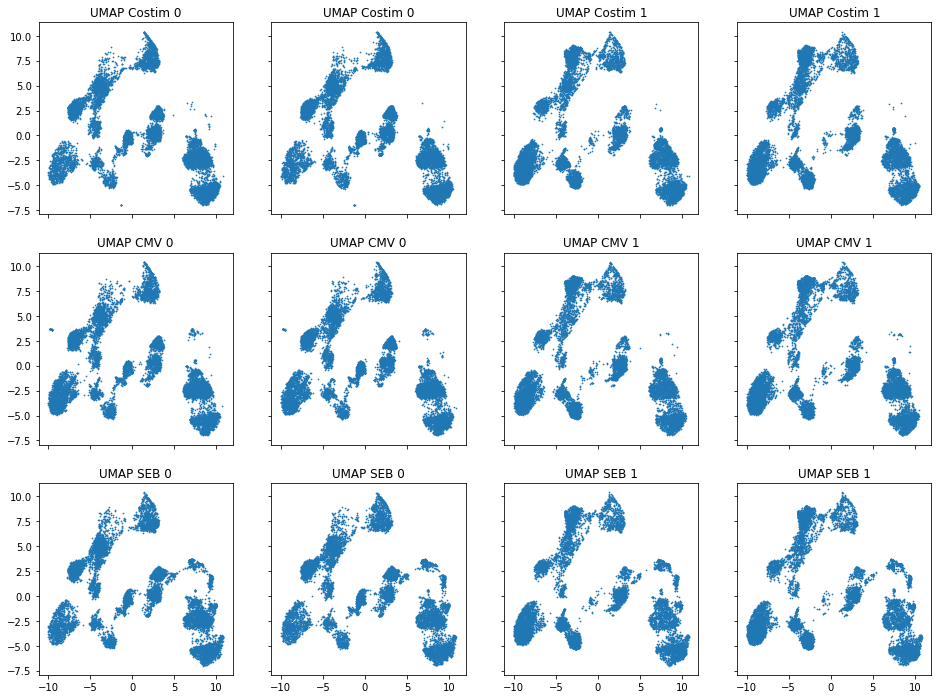

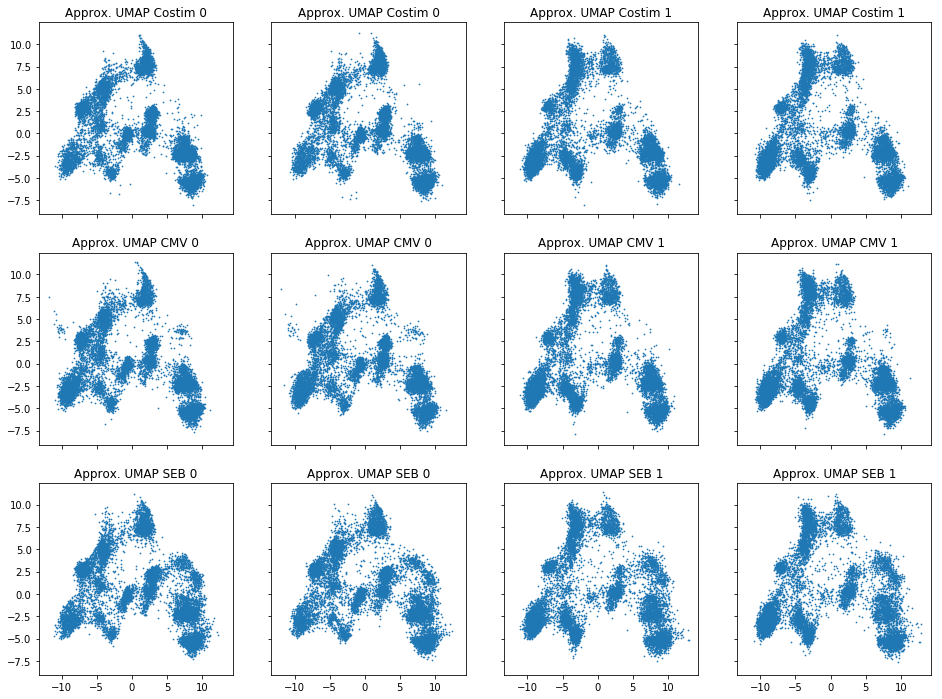

In [95]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap_pool[idx][:, 0], 
            data_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()
#####################################################################
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            y[idx][:, 0], 
            y[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "Approx. UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

In [9]:
k = 1000
sample = data_samples_std[0]
num_cells_tot = sample.shape[0]

rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
X   = sample[idx]

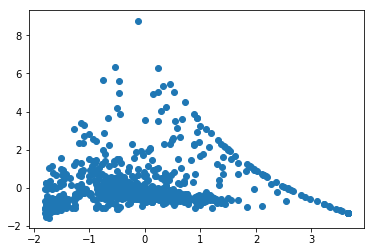

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [117]:
?umap.UMAP

In [11]:
y_umap = umap.UMAP(random_state=0).fit_transform(X)

In [12]:
y_tsne = TSNE(random_state=0).fit_transform(X)

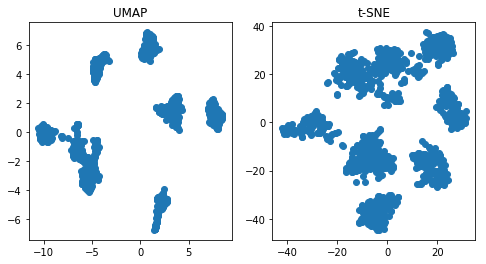

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(y_umap[:, 0], y_umap[:, 1])
plt.title('UMAP')
plt.subplot(122)
plt.scatter(y_tsne[:, 0], y_tsne[:, 1])
plt.title('t-SNE')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_umap)

# Train Neural Network to Approximate the T-SNE

In [15]:
model = Sequential()
model.add(Dense(64, input_shape=(14,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [16]:
history = model.fit(
    X_train, y_train, 
    epochs=1000, 
    batch_size=10, 
    verbose=0,                
    validation_data=(X_test, y_test))

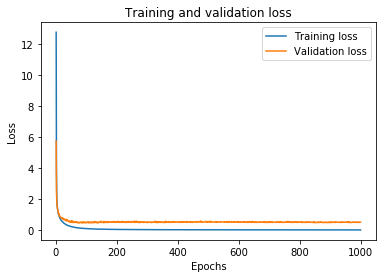

In [17]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

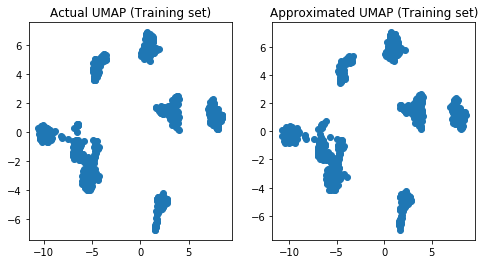

In [19]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(y_train[:, 0], y_train[:, 1])
plt.title('Actual UMAP (Training set)')

plt.subplot(122)
plt.scatter(yhat_train[:, 0], yhat_train[:, 1])
plt.title('Approximated UMAP (Training set)')

plt.show()

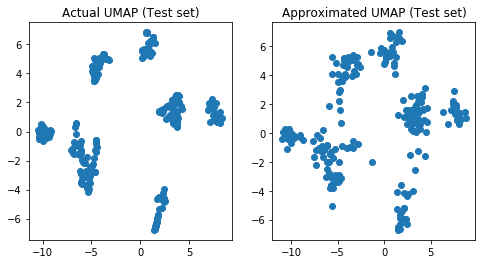

In [20]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1])
plt.title('Actual UMAP (Test set)')

plt.subplot(122)
plt.scatter(yhat_test[:, 0], yhat_test[:, 1])
plt.title('Approximated UMAP (Test set)')

plt.show()

# Try to apply UMAP and approximated NN on the second one

In [21]:
k = 1000
sample = data_samples_std[1]
num_cells_tot = sample.shape[0]

rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
X1  = sample[idx]

In [22]:
y1_umap = umap.UMAP(random_state=0).fit_transform(X1)
yhat1 = model.predict(X1)

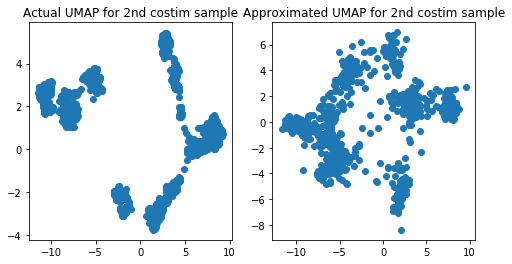

In [25]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(y1_umap[:, 0], y1_umap[:, 1])
plt.title('Actual UMAP for 2nd costim sample')

plt.subplot(122)
plt.scatter(yhat1[:, 0], yhat1[:, 1])
plt.title('Approximated UMAP for 2nd costim sample')

plt.show()

# Discussion 180508
- (optional) run autoencoder (which will be used in Data+)
- run UMAP 
- regularization: 
    - Dropout layer
    - add L1 and L2 penalty

# Try AB sample

In [26]:
k = 1000
samples = list()

sample = data_samples_std[0]
num_cells_tot = sample.shape[0]
rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
samples.append(sample[idx])

sample = data_samples_std[1]
num_cells_tot = sample.shape[0]
rand.seed(0)
idx = rand.permutation(num_cells_tot)[:k]
samples.append(sample[idx])

In [27]:
dat = np.vstack(samples)
dat.shape

(2000, 14)

In [28]:
dat1 = samples[0]
dat2 = samples[1]
print(dat1.shape)
print(dat2.shape)

(1000, 14)
(1000, 14)


In [29]:
dat_umap = umap.UMAP(random_state=0).fit_transform(dat)
dat_umap.shape

(2000, 2)

In [30]:
dat_umap_only2 = umap.UMAP(random_state=0).fit_transform(dat2)
dat_umap_only2.shape

(1000, 2)

In [31]:
dat1_umap = dat_umap[:1000]
dat2_umap = dat_umap[1000:]
print(dat1_umap.shape)
print(dat2_umap.shape)

(1000, 2)
(1000, 2)


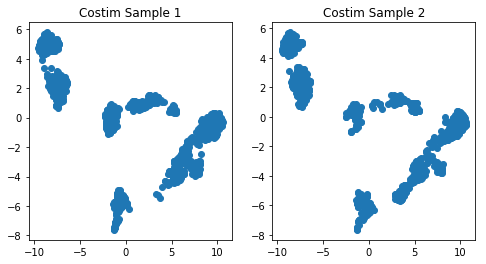

In [32]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(dat1_umap[:, 0], dat1_umap[:, 1])
plt.title('Costim Sample 1')

plt.subplot(122)
plt.scatter(dat2_umap[:, 0], dat2_umap[:, 1])
plt.title('Costim Sample 2')

plt.show()

In [33]:
# this time I split them by 90% for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(dat1, dat1_umap, train_size = 0.9)

/local_data/env-py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 14)
(100, 14)
(900, 2)
(100, 2)


In [64]:
model = Sequential()
model.add(Dense(128, input_shape=(14,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [67]:
history = model.fit(
    X_train, y_train, 
    epochs=1000, 
    batch_size=100, 
    verbose=0,                
    validation_data=(X_test, y_test))

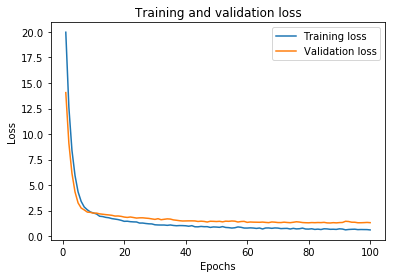

In [66]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [58]:
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

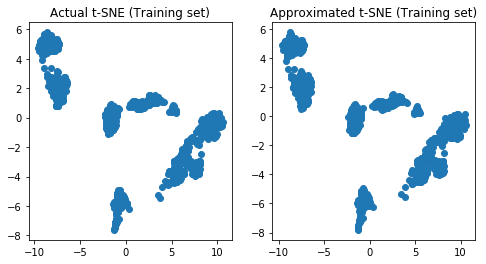

In [59]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(y_train[:, 0], y_train[:, 1])
plt.title('Actual t-SNE (Training set)')

plt.subplot(122)
plt.scatter(yhat_train[:, 0], yhat_train[:, 1])
plt.title('Approximated t-SNE (Training set)')

plt.show()

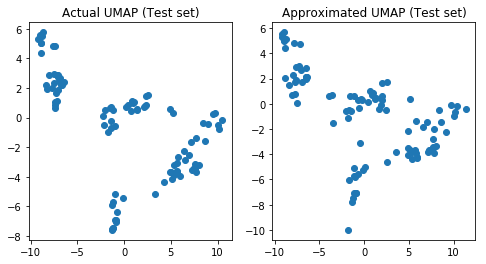

In [60]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1])
plt.title('Actual UMAP (Test set)')

plt.subplot(122)
plt.scatter(yhat_test[:, 0], yhat_test[:, 1])
plt.title('Approximated UMAP (Test set)')

plt.show()

In [61]:
yhat2 = model.predict(dat2)

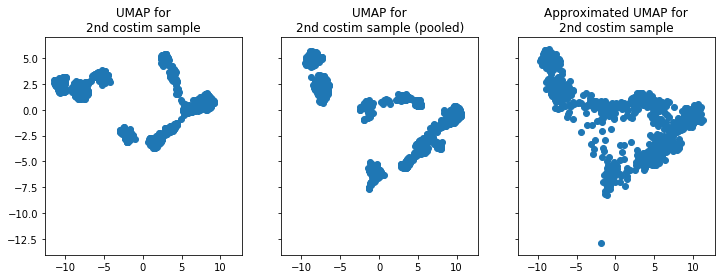

In [74]:
fig, axes = plt.subplots(figsize=(12,4), nrows = 1, ncols = 3, sharex = True, sharey = True)
axes[0].scatter(dat_umap_only2[:, 0], dat_umap_only2[:, 1])
axes[0].set_title('UMAP for\n2nd costim sample')

axes[1].scatter(dat2_umap[:, 0], dat2_umap[:, 1])
axes[1].set_title('UMAP for\n2nd costim sample (pooled)')

axes[2].scatter(yhat2[:, 0], yhat2[:, 1])
axes[2].set_title('Approximated UMAP for\n2nd costim sample')

plt.show()